# Lab 7.04 - Time series analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

/tmp/ipykernel_49625/2839152206.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

/tmp/ipykernel_33229/4084518144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


<Axes: xlabel='Month'>

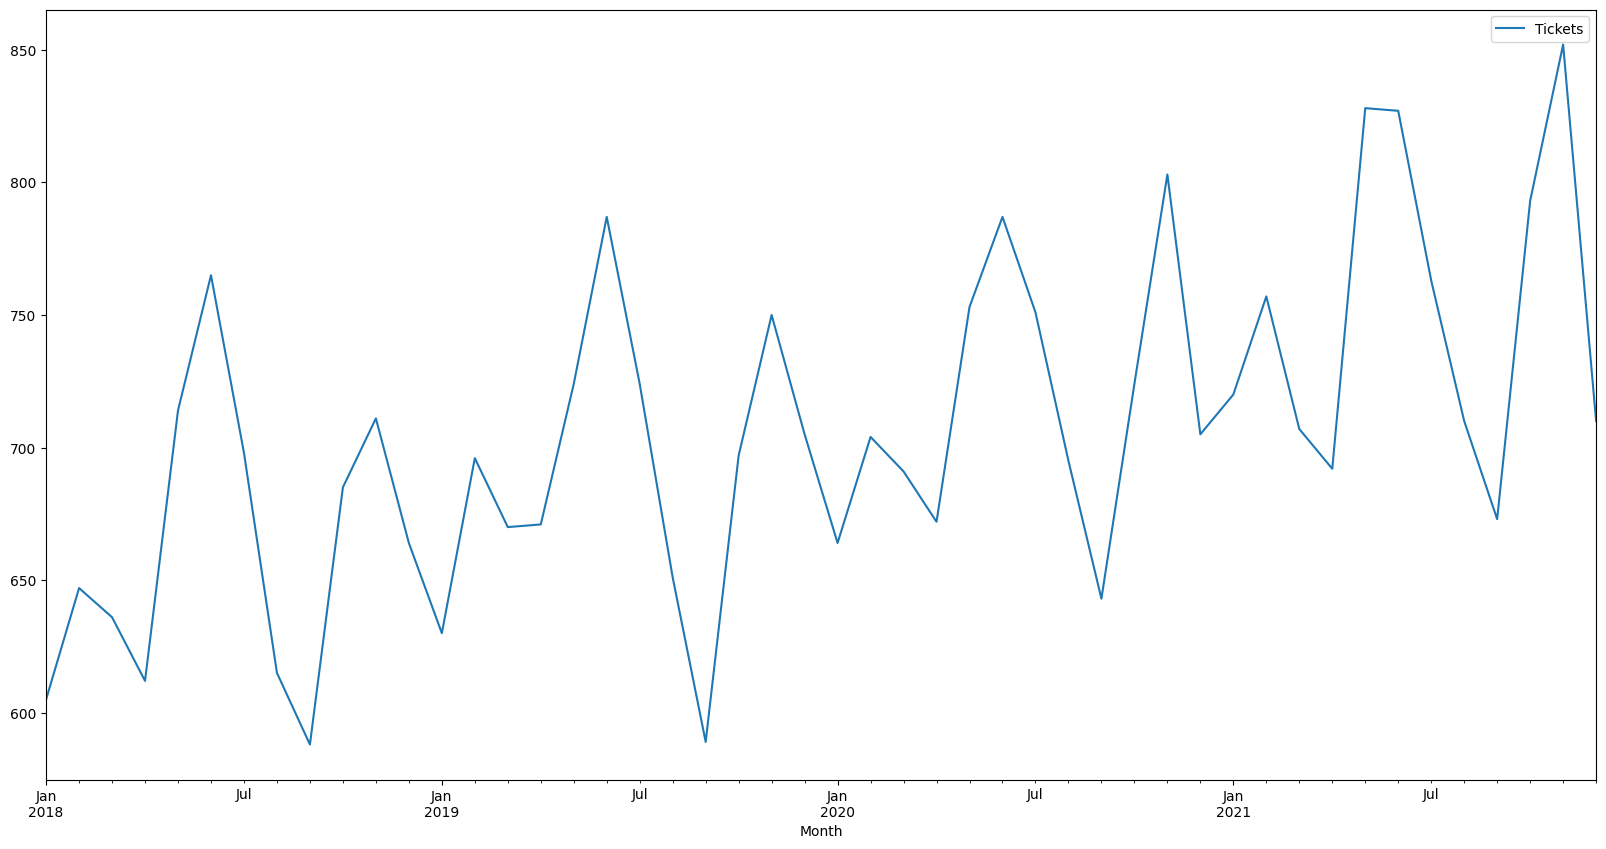

In [4]:
data.plot(y='Tickets', figsize=[20,10])

<Axes: xlabel='Month'>

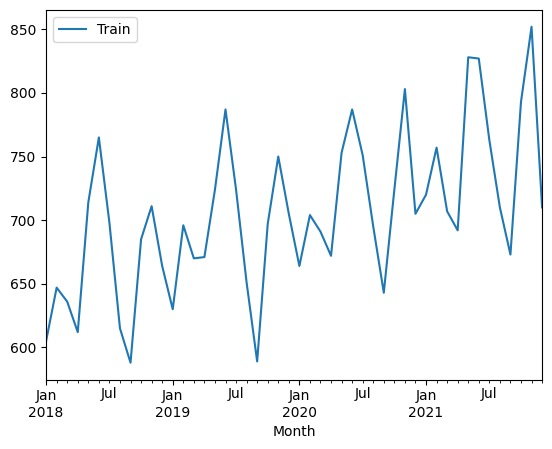

In [15]:
#Voor dit model best gebruik maken van de Triple Exponential Smoothing (Holt winters)
# Creëren en trainen van het model en de waarden voor de volgende 12 maand voorspellen.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets #of train = data['Tickets']

tickets_hw= ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='Train')


In [16]:
# Via fittedvalues kan je mooi vergelijken wat het model zou voorspellen en wat de werkelijk waargenomen data zijn
data['fittedvalues'] = tickets_hw.fittedvalues
data.head()

,Tickets,fittedvalues
Month,,
2018-01-01,605,610.056713
2018-02-01,647,656.318676
2018-03-01,636,631.330324
2018-04-01,612,617.081793
2018-05-01,714,710.087449


Text(0.5, 1.0, 'Train, fitted & predicted values using Holt-Winters')

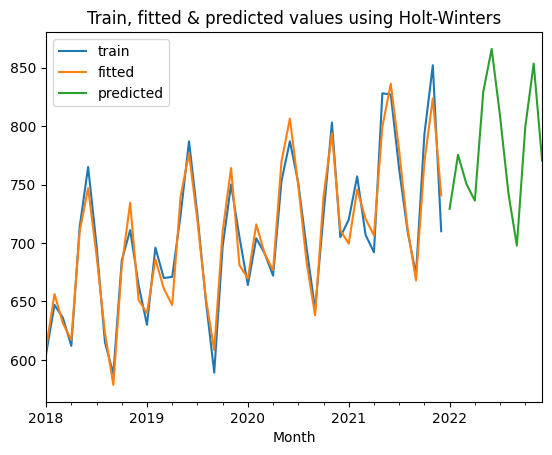

In [18]:
tickets_predicted = tickets_hw.forecast(12)
train.plot(legend=True, label='train')
tickets_hw.fittedvalues.plot(legend=True, label='fitted')

tickets_predicted.plot(legend=True, label='predicted')
plt.title('Train, fitted & predicted values using Holt-Winters')

## Source
Business Analytics Data Analysis & Decision Making 